In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Define the paths to your dataset
data_dir = '/kaggle/input/project/DataSet_5(Final)'

In [4]:
# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training (80%) and validation (20%)
)

In [5]:
# Create an ImageDataGenerator for validation without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Load the training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 4669 images belonging to 7 classes.


In [7]:
# Load the validation data
validation_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 1164 images belonging to 7 classes.


In [11]:

# Load the VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
vgg16_base.trainable = False

# Create a new model on top
model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(460, activation='relu'),
    Dropout(0.2),
    Dense(58, activation='relu'),
    Dense(188, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

In [12]:
# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs based on your needs
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/145 ━━━━━━━━━━━━━━━━━━━━ 1:31:13 38s/step - accuracy: 0.2188 - loss: 1.8575

I0000 00:00:1718025756.244667     364 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718025756.265669     364 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 30/145 ━━━━━━━━━━━━━━━━━━━━ 2:57 2s/step - accuracy: 0.2866 - loss: 2.3334  

W0000 00:00:1718025800.961536     366 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.4464 - loss: 1.6238

W0000 00:00:1718025853.924491     363 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 140s 708ms/step - accuracy: 0.4472 - loss: 1.6209 - val_accuracy: 0.8047 - val_loss: 0.5845
Epoch 2/10
  1/145 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.8125 - loss: 0.6263

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


145/145 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.8125 - loss: 0.6263 - val_accuracy: 0.8333 - val_loss: 0.6394
Epoch 3/10


W0000 00:00:1718025872.251657     363 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 75s 493ms/step - accuracy: 0.6951 - loss: 0.8289 - val_accuracy: 0.8351 - val_loss: 0.4567
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7188 - loss: 0.6440 - val_accuracy: 0.8333 - val_loss: 0.7691
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 74s 486ms/step - accuracy: 0.7449 - loss: 0.7138 - val_accuracy: 0.8307 - val_loss: 0.5065
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6250 - loss: 0.9279 - val_accuracy: 0.8333 - val_loss: 0.2522
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 74s 489ms/step - accuracy: 0.7553 - loss: 0.6817 - val_accuracy: 0.8429 - val_loss: 0.5094
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6875 - loss: 0.8804 - val_accuracy: 0.9167 - val_loss: 0.3224
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 74s 487ms/step - accuracy: 0.7713 - loss: 0.6552 - val_accuracy: 0.8542 - val_loss: 0.3822
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8438 - loss: 0.4005 - val_ac

In [14]:
# Evaluate the VGG16 model
vgg16_loss, vgg16_acc = model_vgg16.evaluate(validation_generator)
print(f'VGG16 Validation Loss: {vgg16_loss}')
print(f'VGG16 Validation Accuracy: {vgg16_acc}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.8509 - loss: 0.3834
VGG16 Validation Loss: 0.37600934505462646
VGG16 Validation Accuracy: 0.8573883175849915


In [15]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

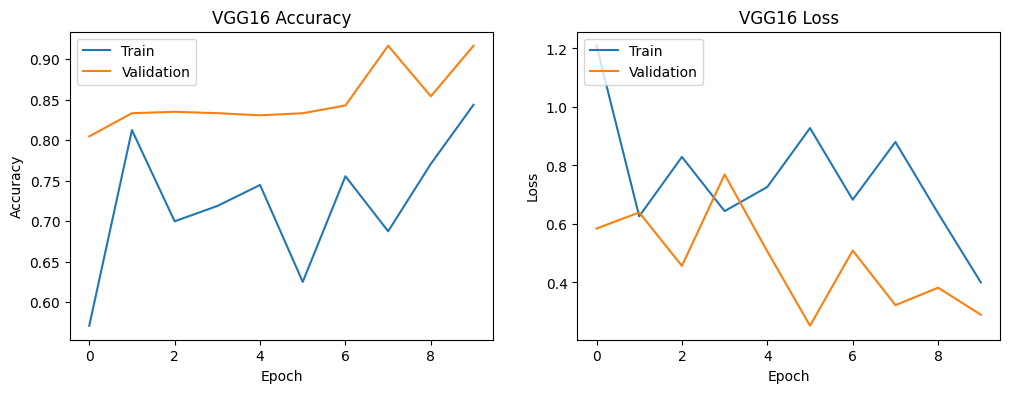

In [16]:
# Plot history for VGG16
plot_history(history_vgg16, 'VGG16')

In [17]:
# Save the VGG16 model
model_vgg16.save('vgg16_DS5(85.99%).h5')

In [ ]:
model_vgg16.summary()

In [ ]:
# Save the VGG16 model
model_vgg16.save('vgg16_DS5(82%).keras')